<a href="https://colab.research.google.com/github/thomas-c-reid/TensorflowDeepLearning/blob/master/12_feed_forward_neural_network_time_series_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

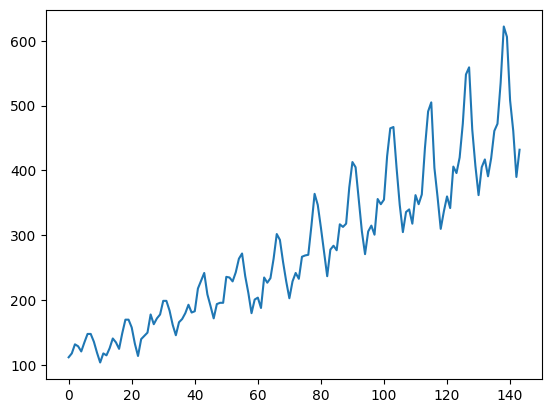

In [4]:
dataframe = read_csv('AirPassengers.csv', usecols=[1])
plt.plot(dataframe)

In [5]:
dataset = dataframe.values
dataset = dataset.astype('float32') #COnvert values to float

In [6]:
# Normalization
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)

In [7]:
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [8]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [9]:
seq_size = 10 # Number of time steps to look back 
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [10]:
print("Shape of training set: {}".format(trainX.shape))
print("Shape of test set: {}".format(testX.shape))

Shape of training set: (84, 10)
Shape of test set: (38, 10)


In [11]:
model = Sequential()
model.add(Dense(64, input_dim=seq_size, activation='relu')) #12
model.add(Dense(32, activation='relu'))  #8
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['acc'])
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)

Epoch 1/100
3/3 - 3s - loss: 0.0214 - acc: 0.0119 - val_loss: 0.0514 - val_acc: 0.0000e+00 - 3s/epoch - 855ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0071 - acc: 0.0119 - val_loss: 0.0184 - val_acc: 0.0263 - 82ms/epoch - 27ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0047 - acc: 0.0119 - val_loss: 0.0251 - val_acc: 0.0263 - 94ms/epoch - 31ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0067 - acc: 0.0119 - val_loss: 0.0256 - val_acc: 0.0263 - 105ms/epoch - 35ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0059 - acc: 0.0119 - val_loss: 0.0197 - val_acc: 0.0263 - 85ms/epoch - 28ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0043 - acc: 0.0119 - val_loss: 0.0172 - val_acc: 0.0263 - 79ms/epoch - 26ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0037 - acc: 0.0119 - val_loss: 0.0187 - val_acc: 0.0263 - 89ms/epoch - 30ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0038 - acc: 0.0119 - val_loss: 0.0199 - val_acc: 0.0263 - 85ms/epoch - 28ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0040 - acc: 0.0119 - val_loss: 0.0185 - val_acc: 0.0263 - 106ms/epoch

In [13]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 4ms/step


In [14]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

In [15]:
trainScore = math.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 10.01 RMSE


In [16]:
testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 24.18 RMSE


In [17]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

In [18]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

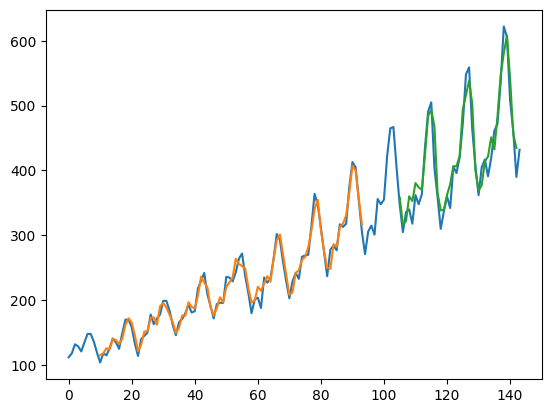

In [19]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()